In [1]:
import numpy as np
import gym
import matplotlib.pyplot as plt

episode  1000 score  -669.0 epsilon 0.800000000000022
episode  2000 score  -523.0 epsilon 0.600000000000044
episode  3000 score  -240.0 epsilon 0.4000000000000661
episode  4000 score  -215.0 epsilon 0.20000000000008117
episode  5000 score  -149.0 epsilon 0.01
episode  6000 score  -151.0 epsilon 0.01
episode  7000 score  -144.0 epsilon 0.01
episode  8000 score  -144.0 epsilon 0.01
episode  9000 score  -145.0 epsilon 0.01


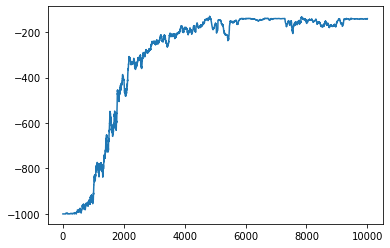

In [2]:
#Create bins for the positions and velocities
pos_space = np.linspace(-1.2, 0.6, 20)
vel_space = np.linspace(-0.07, 0.07, 20)

#Convert position and velocity to bins
def get_state(observation):
    pos, vel = observation
    pos_bin = np.digitize(pos, pos_space)
    vel_bin = np.digitize(vel, vel_space)
    
    return (pos_bin, vel_bin)

#Get the best action from the Q-table
def max_action(Q, state, actions=[0,1,2]):
    #Find the best action from the values array
    values = np.array([Q[state,a] for a in actions])
    action = np.argmax(values)
    return action


if __name__ == '__main__':
    env = gym.make('MountainCar-v0')
    env._max_episode_steps = 1000
    n_games = 10000
    alpha = 0.1
    gamma = 0.99
    #Start with fully random action
    eps = 1.0
    
    #Get all possible states for the Q-table
    states = []
    for pos in range(21):
        for vel in range(21):
            states.append((pos,vel))
            
    #Create Q-table        
    Q = {}
    for state in states:
        for action in [0,1,2]:
            Q[state, action] = 0
    
    score = 0
    total_rewards = np.zeros(n_games)
    
    for i in range(n_games):
        done = False
        obs = env.reset()
        state = get_state(obs)
        if i % 1000 == 0 and i > 0:
            print('episode ', i, 'score ', score, 'epsilon', eps)
            env.render()
        score = 0
        
        #Q-learning
        while not done:
            action = np.random.choice([0,1,2]) if np.random.random() < eps else max_action(Q,state)
            obs_, reward, done, info = env.step(action)
            state_ = get_state(obs_)
            score += reward
            action_ = max_action(Q, state_)
            Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[state_, action_] - Q[state, action])
            state = state_
        total_rewards[i] = score
        #gradually decrease epsilon to make more non-random choices that lead to higher reward.
        eps = eps - 2/n_games if eps > 0.01 else 0.01
        
    mean_rewards = np.zeros(n_games)
    for t in range(n_games):
        mean_rewards[t] = np.mean(total_rewards[max(0, t-50):(t+1)])
    plt.plot(mean_rewards)
    plt.show()